# Exploratory Data Analysis

Importing relevant libraries

In [161]:
import pandas as pd
import seaborn as sns
import numpy as np

Important functions: calculating interquantile range and intervals

In [168]:
def IQR_range(data):
    Q3 = np.quantile(data, 0.75)
    Q1 = np.quantile(data, 0.25)
    IQR = Q3 - Q1
    return IQR

def interval(data):
    return data.max() - data.min()

# First dataset - tips (seaborn)

## 1. Dataset Description

### Importing the dataset

In [162]:
tips = sns.load_dataset("tips")

df_tips = tips.copy()

In [163]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Understanding the dataset

In [164]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [165]:
df_tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

The dataset is formed by 7 variables, with 244 samples each and no NAN data. There are 4 categorical variables, 2 float variables and 1 integer variable

### Creating the dictionary 

In [166]:
tips_dict = {
    'total_bill': {'description': 'total value of the bill', 'type': 'quantitative', 'subtype': 'continuous'}, 
    'tip': {'description': 'tip given by the costumer', 'type': 'quantitative', 'subtype': 'continuous'}, 
    'sex': {'description':'sex of the costumer', 'type': 'qualitative', 'subtype': 'nominal'}, 
    'smoker': {'description':'if the costumer smokes or not', 'type': 'qualitative', 'subtype': 'nominal'}, 
    'day': {'description':'day of the week of bill emission', 'type': 'qualitative', 'subtype': 'nominal'}, 
    'time': {'description':'meal time of bill emission', 'type': 'qualitative', 'subtype': 'nominal'}, 
    'size': {'description':'size of bill', 'type': 'quantitative', 'subtype': 'discrete'}
}

print(tips_dict)

{'total_bill': {'description': 'total value of the bill', 'type': 'quantitative', 'subtype': 'continuous'}, 'tip': {'description': 'tip given by the costumer', 'type': 'quantitative', 'subtype': 'continuous'}, 'sex': {'description': 'sex of the costumer', 'type': 'qualitative', 'subtype': 'nominal'}, 'smoker': {'description': 'if the costumer smokes or not', 'type': 'qualitative', 'subtype': 'nominal'}, 'day': {'description': 'day of the week of bill emission', 'type': 'qualitative', 'subtype': 'nominal'}, 'time': {'description': 'meal time of bill emission', 'type': 'qualitative', 'subtype': 'nominal'}, 'size': {'description': 'size of bill', 'type': 'quantitative', 'subtype': 'discrete'}}


### Describing quantitative data

In [167]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Above, we have a condensed view of the information of the quantitative variables of the dataset. Furthermore, analyzing each one individually, we have:

#### total_bill

##### Central Tendency statistics

In [12]:
print(f'Mean:', df_tips['total_bill'].mean())
print(f'Median:', df_tips['total_bill'].median())
print(f'Mode:', df_tips['total_bill'].mode())

Mean: 19.78594262295082
Median: 17.795
Mode: 0    13.42
Name: total_bill, dtype: float64


##### Dispersion statistics

In [13]:
print(f'Standard Deviation:', df_tips['total_bill'].std())
print(f'Interquartile range:', IQR_range(df_tips['total_bill']))
print(f'Interval:', interval(df_tips['total_bill']))

Standard Deviation: 8.902411954856856
Interquartile range: 10.779999999999998
Interval: 47.74


#### tip

##### Central Tendency statistics

In [14]:
print(f'Mean:', df_tips['tip'].mean())
print(f'Median:', df_tips['tip'].median())
print(f'Mode:', df_tips['tip'].mode())

Mean: 2.99827868852459
Median: 2.9
Mode: 0    2.0
Name: tip, dtype: float64


##### Dispersion statistics

In [15]:
print(f'Standard Deviation:', df_tips['tip'].std())
print(f'Interquartile range:', IQR_range(df_tips['tip']))
print(f'Interval:', interval(df_tips['tip']))

Standard Deviation: 1.3836381890011822
Interquartile range: 1.5625
Interval: 9.0


#### size

##### Central Tendency statistics

In [16]:
print(f'Mean:', df_tips['size'].mean())
print(f'Median:', df_tips['size'].median())
print(f'Mode:', df_tips['size'].mode())

Mean: 2.569672131147541
Median: 2.0
Mode: 0    2
Name: size, dtype: int64


##### Dispersion statistics

In [17]:
print(f'Standard Deviation:', df_tips['size'].std())
print(f'Interquartile range:', IQR_range(df_tips['size']))
print(f'Interval:', interval(df_tips['size']))

Standard Deviation: 0.9510998047322344
Interquartile range: 1.0
Interval: 5


### Insights on quantitative data

It is noticeable that the functions used in the separate quantitative variables descriptions yield results that are very approximate to the ones given by the .describe() function.

### Describing qualitative data

In [18]:
df_tips.astype('object').describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.00,244.0,244,244,244,244,244
unique,229.00,123.0,2,2,4,2,6
top,13.42,2.0,Male,No,Sat,Dinner,2
freq,3.00,33.0,157,151,87,176,156


After using the function .astype('object'), it is possible to visualize categorical data (sex, smoker, day, time). Since all of these 
variables are nominal, we cannot order them to retrieve values such as mean, median, standard deviation, interquartile range and interval. But the mode value and their relation with other variables can be considered.

#### sex 

In [19]:
mode_sex = df_tips['sex'].value_counts()

print(mode_sex)
print(f'Mode:', mode_sex.idxmax())

sex
Male      157
Female     87
Name: count, dtype: int64
Mode: Male


Plotting data is a very important manner of visualizing how data is being distributed and can confirm the information obtained above

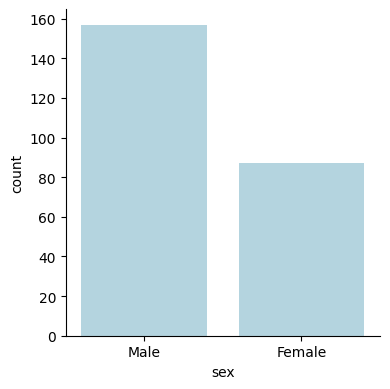

In [20]:
sns.catplot(data=tips, x="sex", kind="count", color="lightblue", height=4)

Scatterplots can also help to understand the relation between predictors and their distributions.

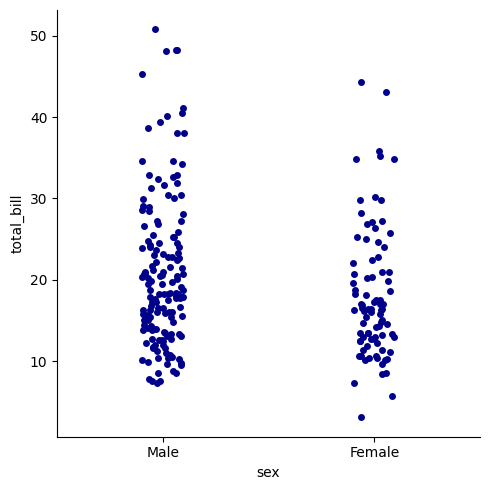

In [21]:
sns.catplot(data=tips, x="sex", y="total_bill", color='darkblue')

Although these type of plots may not give a lot of information about specifical statistical data of the categorical variables, but rather explain the relation between 2 predictors and the distribution of quantitative data considering a specific qualitative predictor.

#### smoker

In [22]:
mode_smoker = df_tips['smoker'].value_counts()

print(mode_smoker)
print(f'Mode:', mode_smoker.idxmax())

smoker
No     151
Yes     93
Name: count, dtype: int64
Mode: No


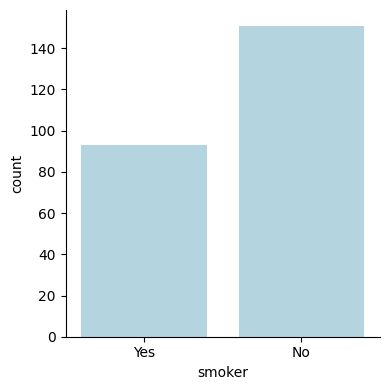

In [23]:
sns.catplot(data=tips, x="smoker", kind="count", color="lightblue", height=4)

#### day

In [24]:
mode_day = df_tips['day'].value_counts()

print(mode_day)
print(f'Mode:', mode_day.idxmax())

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
Mode: Sat


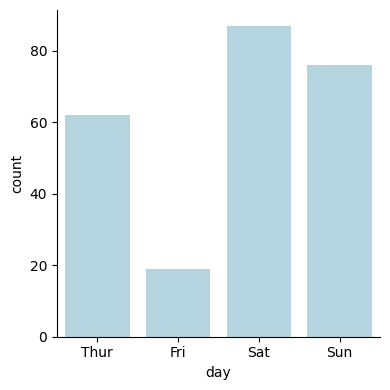

In [25]:
sns.catplot(data=tips, x="day", kind="count", color="lightblue", height=4)

#### time

In [26]:
mode_time = df_tips['time'].value_counts()

print(mode_time)
print(f'Mode:', mode_time.idxmax())

time
Dinner    176
Lunch      68
Name: count, dtype: int64
Mode: Dinner


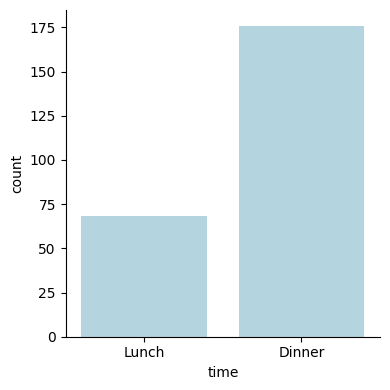

In [27]:
sns.catplot(data=tips, x="time", kind="count", color="lightblue", height=4)

### Insights on qualitative data

Although it is harder to retrieve information from categorical (qualitative) data, some very important data can be retrieved by it, also analyzing the correlation of the categorical data with other types of data and, consequently, understanding the dataset as a whole better.

# Second dataset - titanic (seaborn)

## 1. Dataset Description

### Importing the dataset

In [56]:
titanic = sns.load_dataset("titanic")

df_titanic = titanic.copy()

In [29]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Understanding the dataset

In [30]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [31]:
df_titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

The dataset is formed by 15 variables, with maximum 891 samples each and NAN data in age, deck and embarck_town features. There are 9 categorical variables, 2 float variables, and 4 integer variables 

### Creating the dictionary 

In [32]:
titanic_dict = {
    'survived': {'description': 'if the passenger survived or not', 'type': 'qualitative', 'subtype': 'nominal'}, 
    'pclass': {'description': 'class of the passenger', 'type': 'qualitative', 'subtype': 'ordinal'}, 
    'sex': {'description':'sex of the passenger', 'type': 'qualitative', 'subtype': 'nominal'}, 
    'age': {'description':'age of the passenger', 'type': 'quantitative', 'subtype': 'discrete'}, 
    'sibsp': {'description':'?', 'type': 'qualitative', 'subtype': 'nominal'}, 
    'parch': {'description':'?', 'type': 'qualitative', 'subtype': 'nominal'}, 
    'fare': {'description':'value of the fare', 'type': 'quantitative', 'subtype': 'continuous'},
    'embarked': {'description':'?', 'type': 'qualitative', 'subtype': 'nominal'},
    'class': {'description':'class of titanic', 'type': 'qualitative', 'subtype': 'ordinal'},
    'who': {'description':'sex of passanger', 'type': 'qualitative', 'subtype': 'nominal'},
    'adult_male': {'description':'if the passenger is a male adult', 'type': 'qualitative', 'subtype': 'nominal'},
    'deck': {'description':'passenger deck', 'type': 'qualitative', 'subtype': 'nominal'},
    'embark_town': {'description':'town in which the passenger embarked', 'type': 'qualitative', 'subtype': 'nominal'},
    'alive': {'description':'if the passanger is still alive', 'type': 'qualitative', 'subtype': 'nominal'},
    'alone': {'description':'if the passanger was alone', 'type': 'qualitative', 'subtype': 'nominal'}
}

print(titanic_dict)

{'survived': {'description': 'if the passenger survived or not', 'type': 'qualitative', 'subtype': 'nominal'}, 'pclass': {'description': 'class of the passenger', 'type': 'qualitative', 'subtype': 'ordinal'}, 'sex': {'description': 'sex of the passenger', 'type': 'qualitative', 'subtype': 'nominal'}, 'age': {'description': 'age of the passenger', 'type': 'quantitative', 'subtype': 'discrete'}, 'sibsp': {'description': '?', 'type': 'qualitative', 'subtype': 'nominal'}, 'parch': {'description': '?', 'type': 'qualitative', 'subtype': 'nominal'}, 'fare': {'description': 'value of the fare', 'type': 'quantitative', 'subtype': 'continuous'}, 'embarked': {'description': '?', 'type': 'qualitative', 'subtype': 'nominal'}, 'class': {'description': 'class of titanic', 'type': 'qualitative', 'subtype': 'ordinal'}, 'who': {'description': 'sex of passanger', 'type': 'qualitative', 'subtype': 'nominal'}, 'adult_male': {'description': 'if the passenger is a male adult', 'type': 'qualitative', 'subtype

### Describing quantitative data

In [57]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Although survived and pclass have integer values represented by the .describe() function, they are qualitative predictors

#### age

Dropping NAN data

In [101]:
df_titanic_age = df_titanic['age'].dropna()

##### Central Tendency statistics

In [102]:
df_titanic_age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [103]:
print(f'Mean:', df_titanic_age.mean())
print(f'Median:', df_titanic_age.median())
print(f'Mode:',  df_titanic_age.mode())

Mean: 29.69911764705882
Median: 28.0
Mode: 0    24.0
Name: age, dtype: float64


##### Dispersion statistics

In [108]:
print(f'Standard Deviation:', df_titanic_age.std())
print(f'Interquartile range:', IQR_range(df_titanic_age))
print(f'Interval:', interval(df_titanic_age))

Standard Deviation: 14.526497332334042
Interquartile range: 17.875
Interval: 79.58


#### sibsp

##### Central Tendency statistics

In [113]:
print(f'Mean:', df_titanic['sibsp'].mean())
print(f'Median:', df_titanic['sibsp'].median())
print(f'Mode:', df_titanic['sibsp'].mode())

Mean: 0.5230078563411896
Median: 0.0
Mode: 0    0
Name: sibsp, dtype: int64


##### Dispersion statistics

In [112]:
print(f'Standard Deviation:', df_titanic['sibsp'].std())
print(f'Interquartile range:', IQR_range(df_titanic['sibsp']))
print(f'Interval:', interval(df_titanic['sibsp']))

Standard Deviation: 1.1027434322934317
Interquartile range: 1.0
Interval: 8


#### parch

##### Central Tendency statistics

In [114]:
print(f'Mean:', df_titanic['parch'].mean())
print(f'Median:', df_titanic['parch'].median())
print(f'Mode:', df_titanic['parch'].mode())

Mean: 0.38159371492704824
Median: 0.0
Mode: 0    0
Name: parch, dtype: int64


##### Dispersion statistics

In [115]:
print(f'Standard Deviation:', df_titanic['parch'].std())
print(f'Interquartile range:', IQR_range(df_titanic['parch']))
print(f'Interval:', interval(df_titanic['parch']))

Standard Deviation: 0.8060572211299483
Interquartile range: 0.0
Interval: 6


#### fare

##### Central Tendency statistics

In [116]:
print(f'Mean:', df_titanic['fare'].mean())
print(f'Median:', df_titanic['fare'].median())
print(f'Mode:', df_titanic['fare'].mode())

Mean: 32.204207968574636
Median: 14.4542
Mode: 0    8.05
Name: fare, dtype: float64


##### Dispersion statistics

In [117]:
print(f'Standard Deviation:', df_titanic['fare'].std())
print(f'Interquartile range:', IQR_range(df_titanic['fare']))
print(f'Interval:', interval(df_titanic['fare']))

Standard Deviation: 49.6934285971809
Interquartile range: 23.0896
Interval: 512.3292


### Insights on quantitative data

Again, the results obtained using the python functions yield very approximate values in comparison to the ones obtained when using .describe()

### Describing qualitative data

In [118]:
df_titanic.astype('object').describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,891,891,714.0,891,891,891.00,889,891,891,891,203,889,891,891
unique,2,3,2,88.0,7,7,248.00,3,3,3,2,7,3,2,2
top,0,3,male,24.0,0,0,8.05,S,Third,man,True,C,Southampton,no,True
freq,549,491,577,30.0,608,678,43.00,644,491,537,537,59,644,549,537


Now, visualizing all the data, it is possible to analyze the qualitative data features: survived, pclass, sex, embarked, class, who, adult_male. deck, embark_town, alive and alone.

#### survived

In [119]:
mode_survived = df_titanic['survived'].value_counts()

print(mode_survived)
print(f'Mode:', mode_survived.idxmax())

survived
0    549
1    342
Name: count, dtype: int64
Mode: 0


Again, plotting data to visualize information better

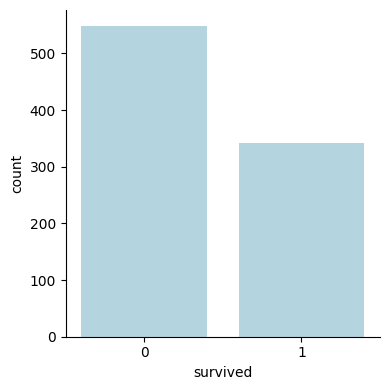

In [120]:
sns.catplot(data=titanic, x="survived", kind="count", color="lightblue", height=4)

#### pclass

In [121]:
mode_pclass = df_titanic['pclass'].value_counts()

print(mode_pclass)
print(f'Mode:', mode_pclass.idxmax())

pclass
3    491
1    216
2    184
Name: count, dtype: int64
Mode: 3


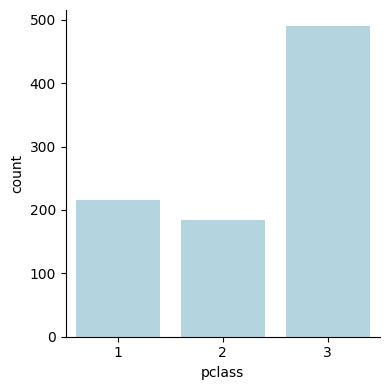

In [122]:
sns.catplot(data=titanic, x="pclass", kind="count", color="lightblue", height=4)

#### sex

In [123]:
mode_sex = df_titanic['sex'].value_counts()

print(mode_sex)
print(f'Mode:', mode_sex.idxmax())

sex
male      577
female    314
Name: count, dtype: int64
Mode: male


Again, plotting data to visualize information better

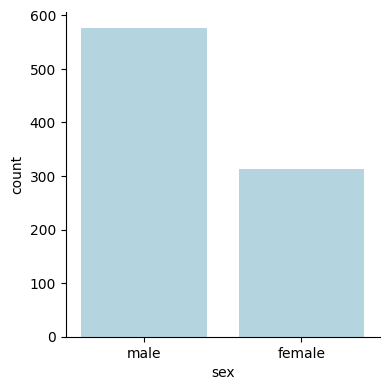

In [124]:
sns.catplot(data=titanic, x="sex", kind="count", color="lightblue", height=4)

#### embarked

In [125]:
mode_embarked = df_titanic['embarked'].value_counts()

print(mode_embarked)
print(f'Mode:', mode_embarked.idxmax())

embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Mode: S


Again, plotting data to visualize information better

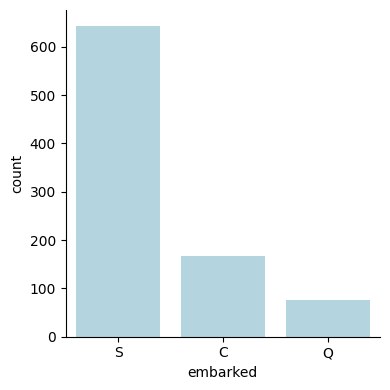

In [126]:
sns.catplot(data=titanic, x="embarked", kind="count", color="lightblue", height=4)

#### class

In [127]:
mode_class = df_titanic['class'].value_counts()

print(mode_class)
print(f'Mode:', mode_class.idxmax())

class
Third     491
First     216
Second    184
Name: count, dtype: int64
Mode: Third


Again, plotting data to visualize information better

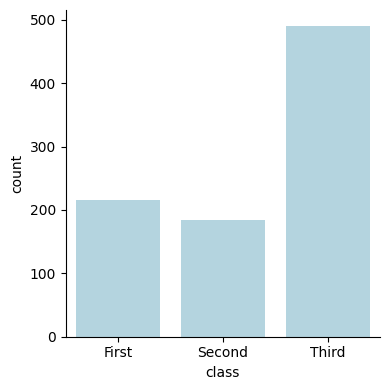

In [128]:
sns.catplot(data=titanic, x="class", kind="count", color="lightblue", height=4)

#### who

In [129]:
mode_who = df_titanic['who'].value_counts()

print(mode_who)
print(f'Mode:', mode_who.idxmax())

who
man      537
woman    271
child     83
Name: count, dtype: int64
Mode: man


Again, plotting data to visualize information better

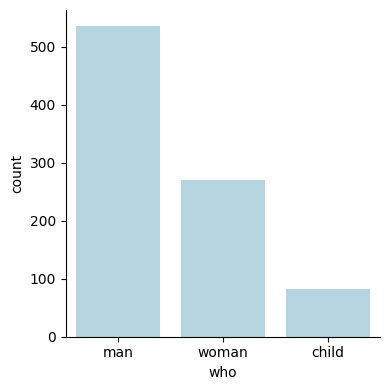

In [130]:
sns.catplot(data=titanic, x="who", kind="count", color="lightblue", height=4)

#### adult_male

In [131]:
mode_adultm = df_titanic['adult_male'].value_counts()

print(mode_adultm)
print(f'Mode:', mode_adultm.idxmax())

adult_male
True     537
False    354
Name: count, dtype: int64
Mode: True


Again, plotting data to visualize information better

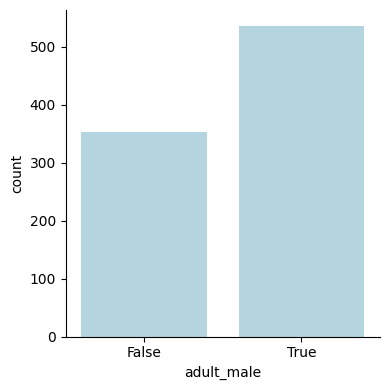

In [132]:
sns.catplot(data=titanic, x="adult_male", kind="count", color="lightblue", height=4)

It is possible to note the association between this feature and the "who" feature, since the sum of TRUE (meaning adult males) is the same as the adult males counted in the feature above.

#### deck

In [133]:
mode_deck = df_titanic['deck'].value_counts()

print(mode_deck)
print(f'Mode:', mode_deck.idxmax())

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64
Mode: C


Again, plotting data to visualize information better

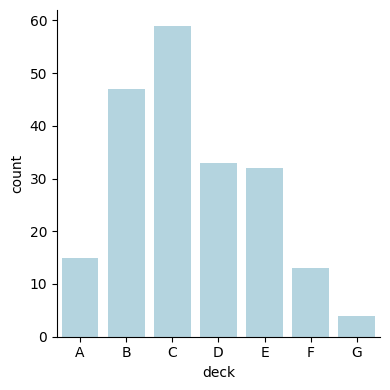

In [134]:
sns.catplot(data=titanic, x="deck", kind="count", color="lightblue", height=4)

#### embark_town

In [135]:
mode_embarkt = df_titanic['embark_town'].value_counts()

print(mode_embarkt)
print(f'Mode:', mode_embarkt.idxmax())

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
Mode: Southampton


Again, plotting data to visualize information better

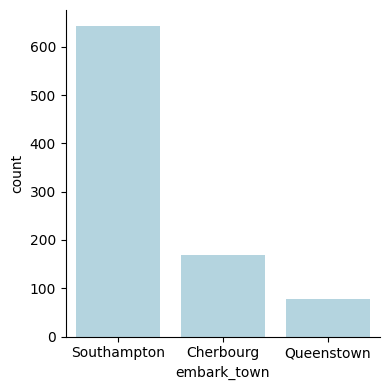

In [137]:
sns.catplot(data=titanic, x="embark_town", kind="count", color="lightblue", height=4)

#### alive

In [138]:
mode_alive = df_titanic['alive'].value_counts()

print(mode_alive)
print(f'Mode:', mode_alive.idxmax())

alive
no     549
yes    342
Name: count, dtype: int64
Mode: no


Again, plotting data to visualize information better

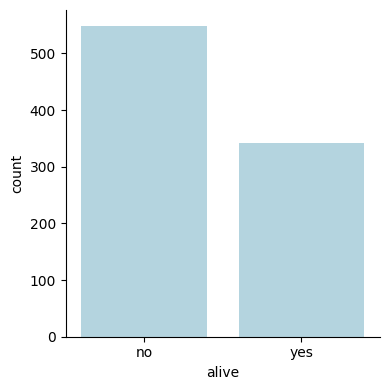

In [139]:
sns.catplot(data=titanic, x="alive", kind="count", color="lightblue", height=4)

#### alone

In [140]:
mode_alone = df_titanic['alone'].value_counts()

print(mode_alone)
print(f'Mode:', mode_alone.idxmax())

alone
True     537
False    354
Name: count, dtype: int64
Mode: True


Again, plotting data to visualize information better

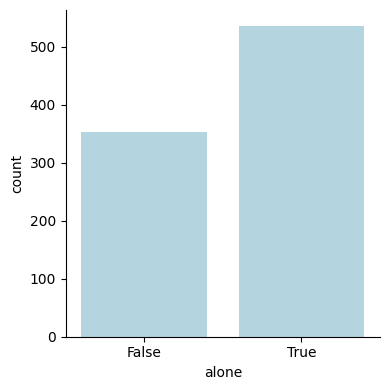

In [141]:
sns.catplot(data=titanic, x="alone", kind="count", color="lightblue", height=4)

### Insights on qualitative data

Data retrieved from qualitative data also brought a new light to some information about the dataset's categorical variables, but other analysis must be made to completely understand the dataset's features relations and distributions.

# Further Steps